In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
df=pd.read_excel('final_feat.xlsx')

In [251]:
df1=df[['Completed Jobs','TMAX','Avg Sales','tech_count','Income_y']]

In [252]:
df1.head()

,Completed Jobs,TMAX,Avg Sales,tech_count,Income_y
0,57,65,3617.444828,59,23933.54
1,77,71,1781.345385,40,65232.03
2,55,69,459.248750,21,26195.32
3,6,69,846.000000,9,264.00
4,73,77,1820.060789,60,48506.16


<AxesSubplot:>

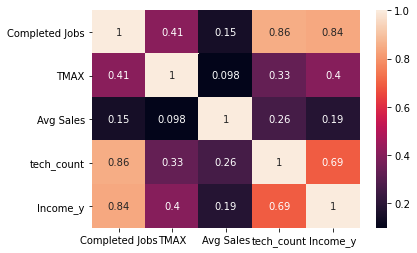

In [253]:
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [254]:
df1=df1.drop_duplicates(ignore_index=True)

In [255]:

df1['f1']=np.sqrt(df1['Completed Jobs']**3)*np.abs(df1['Avg Sales'])
df1['f2']=np.abs(np.sqrt(df1['Completed Jobs']) - np.sqrt(df1['tech_count']))
df1['f3']=np.log(np.sqrt(df1['Completed Jobs'])*df1['TMAX']**3)

<AxesSubplot:>

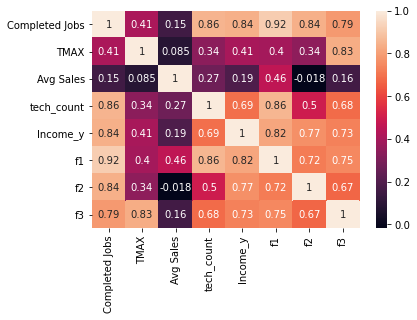

In [256]:
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [257]:
df1.columns

Index(['Completed Jobs', 'TMAX', 'Avg Sales', 'tech_count', 'Income_y', 'f1',
       'f2', 'f3'],
      dtype='object')

In [258]:
df_2=df1[['Completed Jobs','Avg Sales','Income_y', 'f1',
       'f2', 'f3']]

<AxesSubplot:>

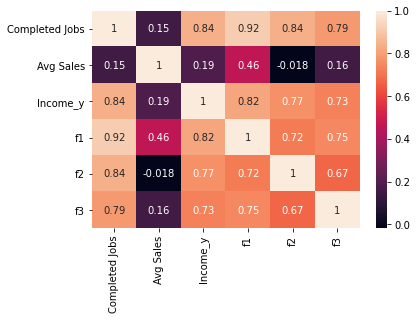

In [259]:
sns.heatmap(df_2.corr(method='spearman'),annot=True)

In [260]:
train=df_2[0:300]
test=df_2[300:]

In [261]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [262]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [264]:
import xgboost as xgb
xgbst_reg=xgb.XGBRegressor()

In [265]:
xgbst_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [266]:
xgbst_reg.score(X_train,y_train)

0.9999983010866093

In [267]:
xgbst_reg.score(X_test,y_test)

0.6409835471895836

In [268]:
xgbst_reg.score(X_,y_)

0.35645882236681947

In [269]:
y_pred_1=xgbst_reg.predict(X_)

In [270]:
from sklearn import metrics

In [271]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred_1))

RMSE: 31013.495321822233
MAE: 25240.27633128773


In [272]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred_1})

<AxesSubplot:>

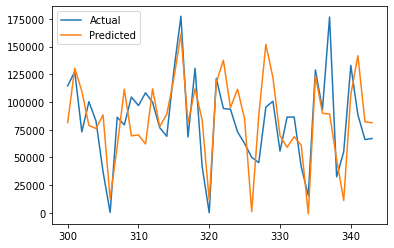

In [273]:
comp.plot()

In [274]:
comp['Error']=comp['Actual']-comp['Predicted']

In [275]:
comp

,Actual,Predicted,Error
300,114534.21,81374.468750,33159.741250
301,127412.10,130514.437500,-3102.337500
302,73107.94,109830.460938,-36722.520937
303,100335.70,78942.835938,21392.864062
304,82920.44,76123.539062,6796.900938
305,36992.00,88326.789062,-51334.789062
306,326.00,12664.957031,-12338.957031
307,86287.17,59945.871094,26341.298906
308,79380.38,111641.398438,-32261.018437
309,104509.01,69482.523438,35026.486562


## Hyperparamter Optimization

In [276]:
# Hyperparameter tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV


In [277]:
# Hyparameter ranges 

from scipy.stats import randint


parameters = {'n_estimators': randint(100,1200),
               'learning_rate': [0.001,0.002,0.003,0.005,0.01,0.04,0.05,0.1,0.2,0.3],
               'max_depth': randint(5,10),
               'subsample': [0.5,0.6,0.7,0.8,0.9],
               'min_child_weight': randint(1,10)
}


In [278]:
# Model for tuning

base_learner=xgb.XGBRegressor()


In [279]:
# Tuning 

tuned_model= RandomizedSearchCV(estimator = base_learner, param_distributions = parameters,scoring='neg_root_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs =-1)

In [280]:
tuned_model.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B4F0C32C88>,
                                        'min_child_weight': <

In [281]:
tuned_model.best_params_

{'learning_rate': 0.005,
 'max_depth': 5,
 'min_child_weight': 8,
 'n_estimators': 727,
 'subsample': 0.7}

In [282]:
tuned_model.best_score_

-38564.96737687335

In [284]:
# Best model

best_model=xgb.XGBRegressor(learning_rate= 0.005,max_depth=5,min_child_weight=8,n_estimators=727,subsample=0.7)

In [285]:
best_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=5,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=727, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [286]:
best_model.score(X_train,y_train)

0.8499717872626159

In [287]:
best_model.score(X_test,y_test)

0.753372274843803

In [288]:
best_model.score(X_,y_)

0.4600965486265878

In [289]:
y_pred_2=best_model.predict(X_)

In [290]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred_2)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred_2))

RMSE: 28406.687706813642
MAE: 21802.709685502483


In [291]:
comp_1=pd.DataFrame({'Actual':y_,'Predicted':y_pred_2})

<AxesSubplot:>

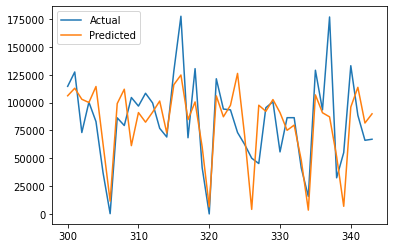

In [292]:
comp_1.plot()

In [293]:
comp_1['Error']=comp_1['Actual']-comp_1['Predicted']

In [294]:
comp_1

,Actual,Predicted,Error
300,114534.21,106070.085938,8464.124063
301,127412.10,112838.929688,14573.170313
302,73107.94,102935.484375,-29827.544375
303,100335.70,100043.257812,292.442187
304,82920.44,114387.992188,-31467.552187
305,36992.00,62747.664062,-25755.664062
306,326.00,11521.782227,-11195.782227
307,86287.17,99084.851562,-12797.681563
308,79380.38,111948.109375,-32567.729375
309,104509.01,61343.277344,43165.732656
